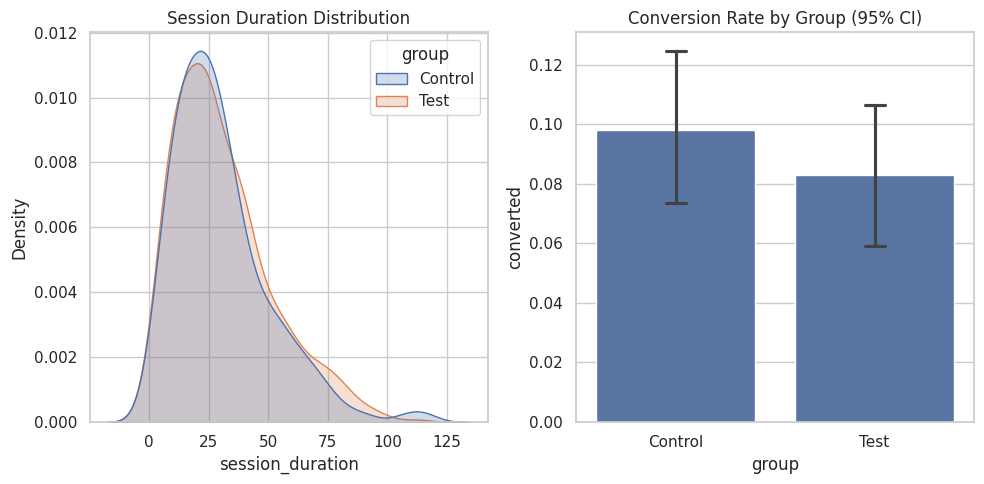

--- Statistical Analysis ---
T-statistic: -0.6725
P-value: 0.5014
95% Bootstrap CI for mean difference: [-1.6019, 3.4005]
Result: No significant difference; fail to reject H0.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Settings for clean visualization
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 5]

# --- 1. Dataset Generation ---
def generate_business_data(n=1000):
    np.random.seed(42)
    df = pd.DataFrame({
        'user_id': range(n),
        'group': np.random.choice(['Control', 'Test'], size=n),
        'session_duration': np.random.gamma(shape=2, scale=15, size=n), # Use Gamma for realistic time data
        'converted': np.random.binomial(1, p=0.10, size=n),
        'age': np.random.normal(32, 8, size=n).astype(int)
    })

    # Simulating data noise for wrangling
    df.iloc[np.random.choice(n, 15), 2] = np.nan  # Missing values
    df.iloc[np.random.choice(n, 5), 2] = 999     # Outliers
    return df

df = generate_business_data()

# --- 2. Data Wrangling & EDA ---
# Handling missing values and extreme outliers [cite: 14]
df['session_duration'] = df['session_duration'].fillna(df['session_duration'].median())
df = df[df['session_duration'] < 300]

# Visualizing feature distributions [cite: 20, 22]
fig, (ax1, ax2) = plt.subplots(1, 2)

sns.kdeplot(data=df, x='session_duration', hue='group', fill=True, ax=ax1)
ax1.set_title('Session Duration Distribution')

sns.barplot(data=df, x='group', y='converted', capsize=.1, ax=ax2)
ax2.set_title('Conversion Rate by Group (95% CI)')
plt.tight_layout()
plt.show()

# --- 3. Hypothesis Testing ---
# A/B Test for Session Duration [cite: 19]
control = df[df['group'] == 'Control']['session_duration']
test = df[df['group'] == 'Test']['session_duration']

t_stat, p_val = stats.ttest_ind(control, test, equal_var=False)

# --- 4. Bootstrap Estimation (Custom Implementation) ---
# Aligns with your "from scratch" skills [cite: 13, 47]
def bootstrap_mean_diff(s1, s2, iterations=5000):
    diffs = []
    for _ in range(iterations):
        sample1 = np.random.choice(s1, size=len(s1), replace=True)
        sample2 = np.random.choice(s2, size=len(s2), replace=True)
        diffs.append(np.mean(sample2) - np.mean(sample1))
    return np.array(diffs)

boot_diffs = bootstrap_mean_diff(control, test)
ci_lower, ci_upper = np.quantile(boot_diffs, [0.025, 0.975])

# --- 5. Summary Output ---
print(f"--- Statistical Analysis ---")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")
print(f"95% Bootstrap CI for mean difference: [{ci_lower:.4f}, {ci_upper:.4f}]")

if p_val < 0.05:
    print("Result: Statistically significant difference detected.")
else:
    print("Result: No significant difference; fail to reject H0.")